# 4.10 Coding Etiquette and Excel Reporting
## 1.1 Initialization
## 1.2 Check for personal protected information
## 1.3 Create 'Region' column
### 1.3.1 Create a histogram of regions and spender flags
## 1.4 Flag and filter out low-activity customers
## 1.5 Create user marketing profile
## 1.6 Visualization of user profiles
## 1.7 Aggregate user profile data
## 1.8 Customer profile correlations with region or department
## 1.9 Customer profile correlation visualization
## 1.10 Export final dataframe and visualization

## 1.1 Initialization

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import PercentFormatter

In [3]:
path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/Instacart Basket Analysis 26-07-2023'

In [4]:
# import order-products-customers dataset
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [ ]:
# import departments as dataframe
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## 1.2 Check for personal protected information

Steps were already taken to remove names and addresses from the data

In [5]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_median,order_frequency_flag,Gender,State,Age,date_joined,number_dependents,family_status,Income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## 1.3 Create 'region' column

In [6]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [7]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana' 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [8]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [9]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'] 

#### Create new list using for-loop and previous region lists

In [10]:
# use for-loop to create a list of region names corresponding to user_id's states
region_result = []

for value in ords_prods_custs["State"]:
  if value in Northeast:
    region_result.append("Northeast")
  elif value in Midwest:
    region_result.append("Midwest")
  elif value in South:
    region_result.append("South")
  else:
    region_result.append("West")

In [11]:
pd.Series(region_result).value_counts()

South        10791885
West          9548514
Midwest       6341724
Northeast     5722736
dtype: int64

In [12]:
# insert list of region names corresponding to state values
ords_prods_custs['Region'] = region_result

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order_price,spender_flag,order_frequency_median,order_frequency_flag,Gender,State,Age,date_joined,number_dependents,family_status,Income,_merge,Region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


### 1.3.1 Create a histogram of regions and spender flags

<Axes: xlabel='Region', ylabel='Percent'>

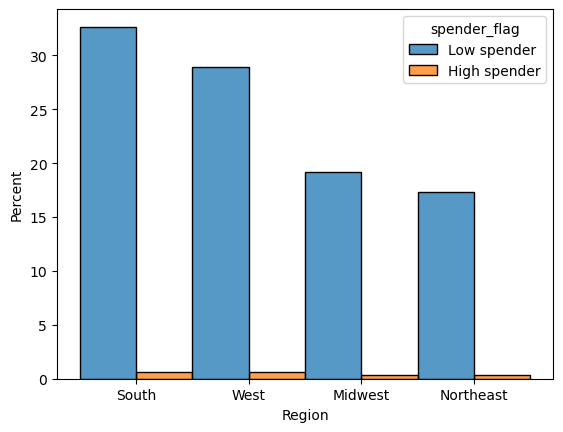

In [15]:
# create a histogram based on regions and spender_flag

sns.histplot(binwidth=1,
            x='Region', 
            hue='spender_flag',
            data=ords_prods_custs,
            stat="percent", 
            multiple="dodge")

## 1.4 Flag and filter out low-activity customers

In [16]:
user_max_order_number = ords_prods_custs.groupby('user_id').agg(max_order = ('order_number','max'))

In [17]:
user_max_order_number.head()

,max_order
user_id,
1,10
2,14
3,12
4,5
5,4


In [18]:
user_max_order_5 = user_max_order_number[user_max_order_number['max_order'] <= 5]

In [19]:
user_max_order_5.head()

,max_order
user_id,
4,5
5,4
6,3
8,3
9,3


In [20]:
user_max_order_5.reset_index(inplace = True)

In [21]:
# create 'low-activity flag' column by checking each user_id is in user_max_order_5 data frame

ords_prods_custs['low-activity flag'] = ords_prods_custs.user_id.isin(user_max_order_5['user_id'])

In [22]:
# view all columns for user_id == 1 to check low-activity flag is False since the max_order is 10
# can check user_id == 4 to check for low-activity flag is True

ords_prods_custs.loc[ords_prods_custs['user_id'] == 1]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order_price,spender_flag,order_frequency_median,order_frequency_flag,Gender,State,Age,date_joined,number_dependents,family_status,Income,_merge,Region,low-activity flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In [23]:
# inplace filter to only see user_ids with normal activity which is 'low-activity flag' == False

ords_prods_custs_normal = ords_prods_custs.loc[ords_prods_custs['low-activity flag'] == False]

In [24]:
# drop '_merge' column

ords_prods_custs_normal = ords_prods_custs_normal.drop(columns = '_merge')

## 1.5 Create user marketing profile

In [25]:
ords_prods_custs['family_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

In [27]:
# reset indecies in departments dataframe
departments.reset_index(inplace = True)

In [28]:
# rename column of previous indecies as 'department_id'
departments.rename(columns={'index': 'department_id'},inplace=True)

In [38]:
departments

,department_id,department
0,0,frozen
1,1,other
2,2,bakery
3,3,produce
4,4,alcohol
5,5,international
6,6,beverages
7,7,pets
8,8,dry goods pasta
9,9,bulk


In [30]:
# merge department names onto normal activity dataframe on 'department_id'

ords_prods_custs_normal = ords_prods_custs_normal.merge(departments, on = 'department_id')

In [31]:
# Define age conditions
age_conditions = [
    (ords_prods_custs_normal['Age'] < 30),                   # Age group: 18-29
    (ords_prods_custs_normal['Age'] >= 30) &                # Age group: 30-44
    (ords_prods_custs_normal['Age'] < 45),
    (ords_prods_custs_normal['Age'] >= 45) &                # Age group: 45-59
    (ords_prods_custs_normal['Age'] < 60),
    (ords_prods_custs_normal['Age'] >= 60)                 # Age group: 60+
]

# Define the corresponding labels
age_values = ['18-29', '30-45', '45-59', '60+']

# Create a new 'age group' column in the dataframe
# If none of the conditions match, set it to 'Unknown'
ords_prods_custs_normal['age group'] = np.select(
    condlist=age_conditions,
    choicelist=age_values,
    default='Unknown'
)

In [32]:
# Define the income conditions
income_conditions = [
    (ords_prods_custs_normal['Income'] < 50000),               # Low Income (< $50,000)
    (ords_prods_custs_normal['Income'] >= 50000) &            # Moderate Income ($50,000 - $99,999)
    (ords_prods_custs_normal['Income'] < 100000),
    (ords_prods_custs_normal['Income'] >= 100000) &            # High Income ($100,000 - $149,999)
    (ords_prods_custs_normal['Income'] < 150000),
    (ords_prods_custs_normal['Income'] >= 150000)             # Very High Income (>= $150,000)
]

# Define the corresponding labels
income_values = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

# Create a new 'income group' column in the dataframe
# If none of the conditions match, set it to 'Unknown'
ords_prods_custs_normal['income group'] = np.select(
    condlist=income_conditions,
    choicelist=income_values,
    default='Unknown'
)

In [33]:
# Define dependent conditions
dependents_conditions = [
    (ords_prods_custs_normal['number_dependents'] == 0),      # 0 dependents
    (ords_prods_custs_normal['number_dependents'] >= 1) &    # 1 or 2 dependents
    (ords_prods_custs_normal['number_dependents'] <= 2),
    (ords_prods_custs_normal['number_dependents'] >= 3)      # 3 or more dependents
]

# Define the corresponding labels
dependents_values = ['0', '1-2', '3+']

# Create a new 'dependents group' column in the dataframe
# If none of the conditions match, set it to 'Unknown'
ords_prods_custs_normal['dependents group'] = np.select(
    condlist=dependents_conditions,
    choicelist=dependents_values,
    default='Unknown'
)


In [34]:
ords_prods_custs_normal.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order_price,spender_flag,order_frequency_median,order_frequency_flag,Gender,State,Age,date_joined,number_dependents,family_status,Income,Region,low-activity flag,department,age group,income group,dependents group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False,pets,30-45,Low Income,3+
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False,pets,30-45,Low Income,3+
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False,pets,30-45,Low Income,3+
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False,pets,30-45,Low Income,3+
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,False,pets,30-45,Low Income,3+


## 1.6 Visualization of user profiles

In [ ]:
# Custom order for income groups
custom_order = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

# Grouping and counting values in the 'income group' column
income_counts = ords_prods_custs_normal['income group'].value_counts().loc[custom_order]

# Creating a bar plot
plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar', color='skyblue')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count (in millions)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Custom order for age groups
custom_age_order = ['18-29', '30-45', '45-59', '60+']

# Grouping and counting values in the 'age group' column
age_counts = ords_prods_custs_normal['age group'].value_counts().loc[custom_age_order]

# Creating a bar plot
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='purple')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count (in millions)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Grouping and counting values in the 'dependents group' column
dependents_counts = ords_prods_custs_normal['dependents group'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dependents Group Distribution')
plt.axis('equal')
plt.show()


## 1.7 Aggregate user profile data

In [ ]:
# Calculate the maximum order frequency median by age group (reversed)
max_order_frequency_by_age = ords_prods_custs_normal.groupby('age group')['order_frequency_median'].min()




# Calculate the minimum order frequency median by age group (reversed)
min_order_frequency_by_age = ords_prods_custs_normal.groupby('age group')['order_frequency_median'].max()

# Calculate the mean order frequency median by age group
mean_order_frequency_by_age = ords_prods_custs_normal.groupby('age group')['order_frequency_median'].mean()

# Calculate the minimum expenditure by age group
min_expenditure_by_age = ords_prods_custs_normal.groupby(['age group', 'order_number', 'user_id'])['prices'].sum().groupby('age group').min()

# Calculate the maximum expenditure by age group
max_expenditure_by_age = ords_prods_custs_normal.groupby(['age group', 'order_number', 'user_id'])['prices'].sum().groupby('age group').max()

# Calculate the mean expenditure by age group
mean_expenditure_by_age = ords_prods_custs_normal.groupby(['age group', 'order_number', 'user_id'])['prices'].sum().groupby('age group').mean()

# Print the results for order frequency 
print("Max Order Frequency by Age Group:")
print(max_order_frequency_by_age)

print("\nMin Order Frequency by Age Group:")
print(min_order_frequency_by_age)

print("\nMean Order Frequency by Age Group:")
print(mean_order_frequency_by_age)

# Print the results for expenditures
print("\nMin Expenditure by Age Group:")
print(min_expenditure_by_age)

print("\nMax Expenditure by Age Group:")
print(max_expenditure_by_age)

print("\nMean Expenditure by Age Group:")
print(mean_expenditure_by_age)


In [ ]:
# Calculate the maximum order frequency median by income group (reversed)
max_order_frequency_by_income = ords_prods_custs_normal.groupby('income group')['order_frequency_median'].min()

# Calculate the minimum order frequency median by income group (reversed)
min_order_frequency_by_income = ords_prods_custs_normal.groupby('income group')['order_frequency_median'].max()

# Calculate the mean order frequency median by income group
mean_order_frequency_by_income = ords_prods_custs_normal.groupby('income group')['order_frequency_median'].mean()

# Calculate the minimum expenditure by income group
min_expenditure_by_income = ords_prods_custs_normal.groupby(['income group', 'order_number', 'user_id'])['prices'].sum().groupby('income group').min()

# Calculate the maximum expenditure by income group
max_expenditure_by_income = ords_prods_custs_normal.groupby(['income group', 'order_number', 'user_id'])['prices'].sum().groupby('income group').max()

# Calculate the mean expenditure by income group
mean_expenditure_by_income = ords_prods_custs_normal.groupby(['income group', 'order_number', 'user_id'])['prices'].sum().groupby('income group').mean()

# Print the results for order frequency 
print("Max Order Frequency by Income Group:")
print(max_order_frequency_by_income)

print("\nMin Order Frequency by Income Group:")
print(min_order_frequency_by_income)

print("\nMean Order Frequency by Income Group:")
print(mean_order_frequency_by_income)

# Print the results for expenditures
print("\nMin Expenditure by Income Group:")
print(min_expenditure_by_income)

print("\nMax Expenditure by Income Group:")
print(max_expenditure_by_income)

print("\nMean Expenditure by Income Group:")
print(mean_expenditure_by_income)


In [ ]:
# Calculate the maximum order frequency median by dependents group (reversed)
max_order_frequency_by_dependents = ords_prods_custs_normal.groupby('dependents group')['order_frequency_median'].min()

# Calculate the minimum order frequency median by dependents group (reversed)
min_order_frequency_by_dependents = ords_prods_custs_normal.groupby('dependents group')['order_frequency_median'].max()

# Calculate the mean order frequency median by dependents group
mean_order_frequency_by_dependents = ords_prods_custs_normal.groupby('dependents group')['order_frequency_median'].mean()

# Calculate the minimum expenditure by dependents group
min_expenditure_by_dependents = ords_prods_custs_normal.groupby(['dependents group', 'order_number', 'user_id'])['prices'].sum().groupby('dependents group').min()

# Calculate the maximum expenditure by dependents group
max_expenditure_by_dependents = ords_prods_custs_normal.groupby(['dependents group', 'order_number', 'user_id'])['prices'].sum().groupby('dependents group').max()

# Calculate the mean expenditure by dependents group
mean_expenditure_by_dependents = ords_prods_custs_normal.groupby(['dependents group', 'order_number', 'user_id'])['prices'].sum().groupby('dependents group').mean()

# Print the results for order frequency 
print("Max Order Frequency by Dependents Group:")
print(max_order_frequency_by_dependents)

print("\nMin Order Frequency by Dependents Group:")
print(min_order_frequency_by_dependents)

print("\nMean Order Frequency by Dependents Group:")
print(mean_order_frequency_by_dependents)

# Print the results for expenditures
print("\nMin Expenditure by Dependents Group:")
print(min_expenditure_by_dependents)

print("\nMax Expenditure by Dependents Group:")
print(max_expenditure_by_dependents)

print("\nMean Expenditure by Dependents Group:")
print(mean_expenditure_by_dependents)


## 1.8 Customer profile correlations with region or department

In [33]:
# aggregate order frequency over each group and department
mean_order_frequency_by_age_department = ords_prods_custs_normal.groupby(['age group', 'department'])['order_frequency_median'].mean()
mean_order_frequency_by_dependents_department = ords_prods_custs_normal.groupby(['dependents group', 'department'])['order_frequency_median'].mean()
mean_order_frequency_by_income_department = ords_prods_custs_normal.groupby(['income group', 'department'])['order_frequency_median'].mean()

print ("Mean Order Frequency by Age and Departments")
print (mean_order_frequency_by_age_department)

print ("\nMean Order Frequency by Dependents and Departments")
print (mean_order_frequency_by_dependents_department)

print ("\nMean Order Frequency by Income and Departments")
print (mean_order_frequency_by_income_department)

Mean Order Frequency by Age and Departments
age group  department   
18-29      alcohol           9.454305
           babies           10.530458
           bakery            9.357100
           beverages         9.868923
           breakfast         9.842438
                              ...    
60+        pantry            9.967606
           personal care     8.867314
           pets              9.667755
           produce           9.610581
           snacks            8.611940
Name: order_frequency_median, Length: 80, dtype: float64

Mean Order Frequency by Dependents and Departments
dependents group  department     
0                 alcohol             9.428325
                  babies             10.522295
                  bakery              9.484907
                  beverages           9.849845
                  breakfast           9.831276
                  bulk               10.197182
                  canned goods        9.801256
                  dairy eggs         10.1

In [34]:
# aggregate order frequency over each group and Region
mean_order_frequency_by_age_region = ords_prods_custs_normal.groupby(['age group', 'Region'])['order_frequency_median'].mean()
mean_order_frequency_by_dependents_region = ords_prods_custs_normal.groupby(['dependents group', 'Region'])['order_frequency_median'].mean()
mean_order_frequency_by_income_region = ords_prods_custs_normal.groupby(['income group', 'Region'])['order_frequency_median'].mean()

print ("Mean Order Frequency by Age and Region")
print (mean_order_frequency_by_age_region)

print ("\nMean Order Frequency by Dependents and Region")
print (mean_order_frequency_by_dependents_region)

print ("\nMean Order Frequency by Income and Region")
print (mean_order_frequency_by_income_region)

Mean Order Frequency by Age and Region
age group  Region   
18-29      Midwest      9.806290
           Northeast    9.511166
           South        9.682888
           West         9.755698
30-45      Midwest      9.708675
           Northeast    9.862491
           South        9.693112
           West         9.599678
45-59      Midwest      9.736909
           Northeast    9.743223
           South        9.763254
           West         9.687660
60+        Midwest      9.824217
           Northeast    9.590009
           South        9.699658
           West         9.708953
Name: order_frequency_median, dtype: float64

Mean Order Frequency by Dependents and Region
dependents group  Region   
0                 Midwest      9.631421
                  Northeast    9.745880
                  South        9.726420
                  West         9.628185
1-2               Midwest      9.788856
                  Northeast    9.649464
                  South        9.713335
            

In [33]:
# aggregate expenditure over each group and Departments
mean_expenditure_by_age_department = ords_prods_custs_normal.groupby(['age group', 'department', 'order_number', 'user_id'])['prices'].sum().groupby(['age group', 'department']).mean()
mean_expenditure_by_dependents_department = ords_prods_custs_normal.groupby(['dependents group', 'department', 'order_number', 'user_id'])['prices'].sum().groupby(['dependents group', 'department']).mean()
mean_expenditure_by_income_department = ords_prods_custs_normal.groupby(['income group', 'department', 'order_number', 'user_id'])['prices'].sum().groupby(['income group','department']).mean()


print ("Mean Expenditure by Age and Department")
print (mean_expenditure_by_age_department)

print ("\nMean Expenditure by Dependents and Department")
print (mean_expenditure_by_dependents_department)

print ("\nMean Expenditure by Income and Department")
print (mean_expenditure_by_income_department)

Mean Expenditure by Age and Department
age group  department   
18-29      alcohol          31.423455
           babies           11.451689
           bakery            7.072576
           beverages         9.283763
           breakfast        13.361823
                              ...    
60+        pantry           20.043277
           personal care     8.526156
           pets             14.248450
           produce          10.564798
           snacks           18.071969
Name: prices, Length: 80, dtype: float64

Mean Expenditure by Dependents and Department
dependents group  department     
0                 alcohol            31.487631
                  babies             11.423904
                  bakery              7.176213
                  beverages           9.295687
                  breakfast          13.377437
                  bulk               10.576520
                  canned goods       10.804537
                  dairy eggs         11.688959
                  de

In [35]:
# aggregate expenditure over each group and Region
mean_expenditure_by_age_region = ords_prods_custs_normal.groupby(['age group', 'Region', 'order_number', 'user_id'])['prices'].sum().groupby(['age group', 'Region']).mean()
mean_expenditure_by_dependents_region = ords_prods_custs_normal.groupby(['dependents group', 'Region', 'order_number', 'user_id'])['prices'].sum().groupby(['dependents group', 'Region']).mean()
mean_expenditure_by_income_region = ords_prods_custs_normal.groupby(['income group', 'Region', 'order_number', 'user_id'])['prices'].sum().groupby(['income group','Region']).mean()


print ("Mean Expenditure by Age and Region")
print (mean_expenditure_by_age_region)

print ("\nMean Expenditure by Dependents and Region")
print (mean_expenditure_by_dependents_region)

print ("\nMean Expenditure by Income and Region")
print (mean_expenditure_by_income_region)

Mean Expenditure by Age and Region
age group  Region   
18-29      Midwest      154.435097
           Northeast    105.320072
           South        117.484663
           West         119.480938
30-45      Midwest      119.434375
           Northeast    111.882406
           South        126.567005
           West         107.618271
45-59      Midwest      133.634598
           Northeast    122.441980
           South        124.588802
           West         115.185717
60+        Midwest      115.708633
           Northeast    118.642104
           South        120.161568
           West         114.496720
Name: prices, dtype: float64

Mean Expenditure by Dependents and Region
dependents group  Region   
0                 Midwest      137.727159
                  Northeast    115.304873
                  South        128.605500
                  West         107.380838
1-2               Midwest      128.464787
                  Northeast    117.265823
                  South        1

## 1.9 Customer profile correlation visualization

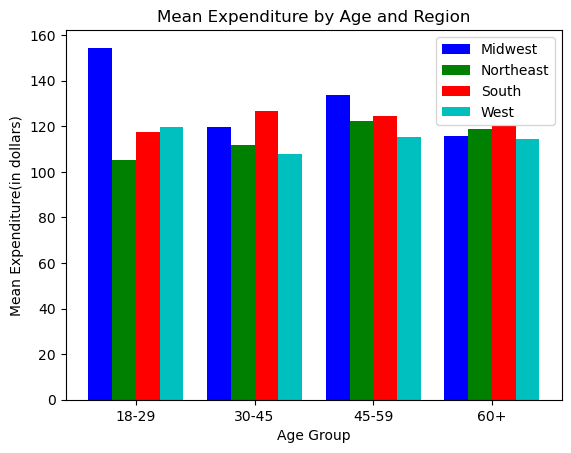

In [36]:
# Unstack the Series to create a DataFrame suitable for plotting
df = mean_expenditure_by_age_region.unstack().reset_index()

# Define the number of bars and their width
num_bars = len(df)
bar_width = 0.2

# Create an array of indices for the x-axis ticks
x_indices = range(num_bars)

# Create a list of colors for bars
colors = ['b', 'g', 'r', 'c', 'm']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each age group's data as a separate set of bars
for i, region in enumerate(df.columns[1:]):
    ax.bar([x + i * bar_width for x in x_indices], df[region], bar_width, label=region, color=colors[i])

# Set x-axis labels and tick positions
ax.set_xticks([x + (bar_width * (num_bars - 1) / 2) for x in x_indices])
ax.set_xticklabels(df['age group'])

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Mean Expenditure(in dollars)')
ax.set_title('Mean Expenditure by Age and Region')

# Add a legend
ax.legend()

# Show the plot
plt.show()


## 1.10 Export final dataframe and visualization

In [35]:
# export dataframe to '05 Send to Client' folder

ords_prods_custs_normal.to_pickle(os.path.join(path, '05 Send to Client', 'orders_products_customers_normal_activity.pkl'))

In [37]:
# export visualization to '05 Send to Client' folder

ax.figure.savefig(os.path.join(path, '05 Send to Client', 'customer_age_mean_expenditure.png'))